# Laboratory #03 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

## **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---

# **Students** (First Name and Last Name)

1. Eva Veli  
2. Tatevik Davtyan  

---

In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, feature, filters, io, morphology, util
from scipy.ndimage import convolve
import skimage
import cv2
from scipy.ndimage import median_filter
from skimage.morphology import  square, rectangle, diamond, disk
from skimage.filters import rank

# Convolution
Hint:
*   *convolve function is available in scipy.ndimage module*
*   The mask has to be normalized before convolving with the image

### Exercise:
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to ones


In [ ]:
image = data.camera()
def convolve_image_with_mask(image, vertizal_size, horizontal_size):
    # Create a horizontal mask (1 x mask_size) with all values set to ones
    mask = np.ones(shape=(vertizal_size, horizontal_size), dtype=np.float64)

    # Normalize the mask
    mask /= mask.sum()

    # Convolve the image with the mask
    convolved_image = convolve(image, mask)

    return convolved_image

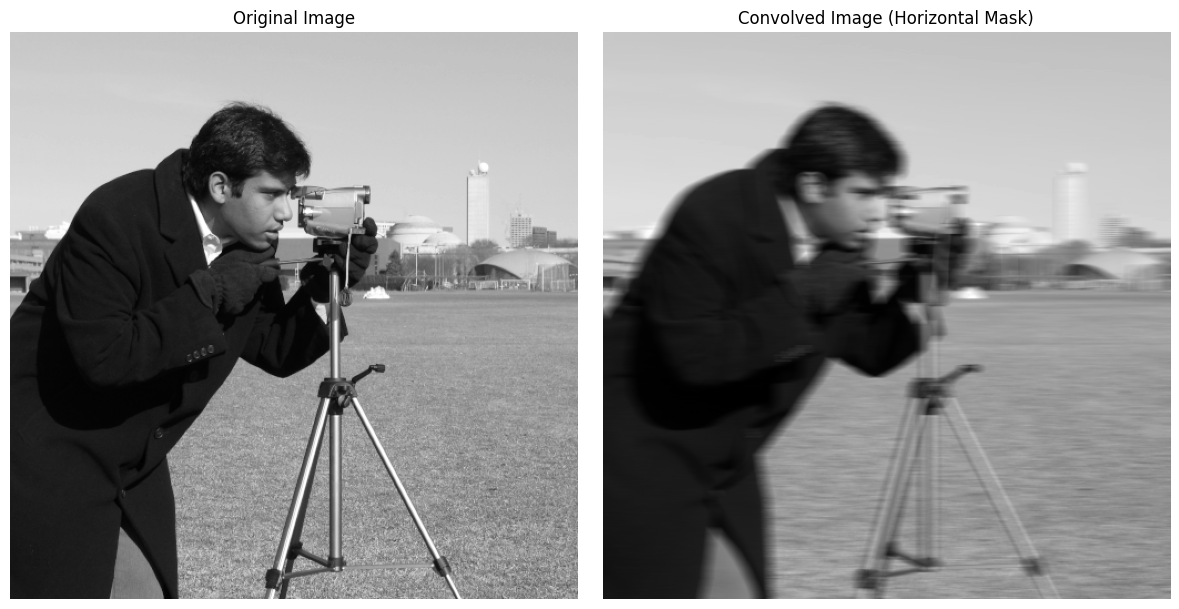

In [ ]:
horizontal_convolution = convolve_image_with_mask(image, 1, 15)

# Plot the original and convolved images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(horizontal_convolution, cmap='gray')
axes[1].set_title(f'Convolved Image (Horizontal Mask)')
axes[1].axis('off')

plt.tight_layout()
plt.show()


*   Convolve the image with a vertical mask:  (15 x 1) with all values set to ones

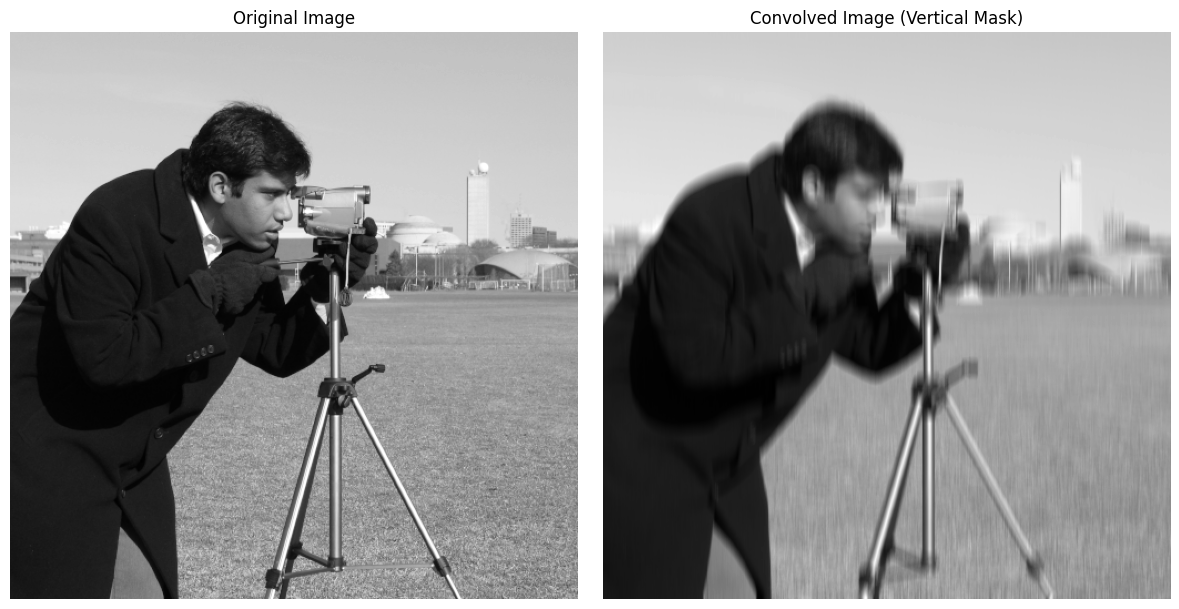

In [ ]:
# solution
vertical_convolution = convolve_image_with_mask(image, 15, 1)

# Plot the original and convolved images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(vertical_convolution, cmap='gray')
axes[1].set_title(f'Convolved Image (Vertical Mask)')
axes[1].axis('off')

plt.tight_layout()
plt.show()



*   Convolve the image with a 2D mask:  (15 x 15) with all values set to ones

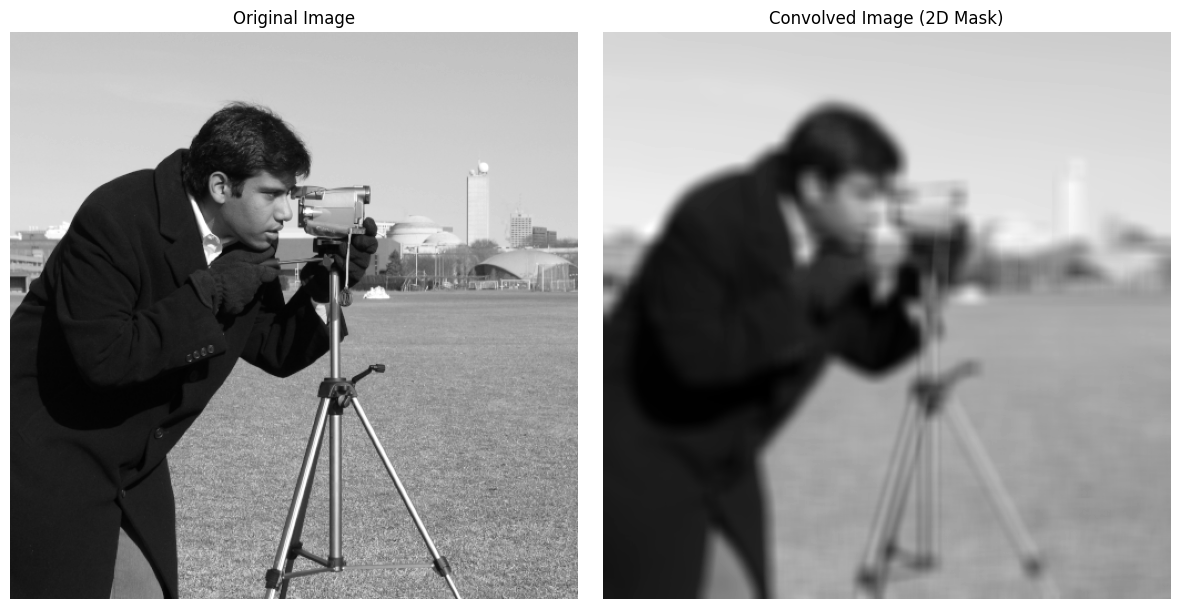

In [ ]:
# solution
two_dimensional_convolution = convolve_image_with_mask(image, 15, 15)
# Display the original and convolved image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(two_dimensional_convolution, cmap='gray')
axes[1].set_title('Convolved Image (2D Mask)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

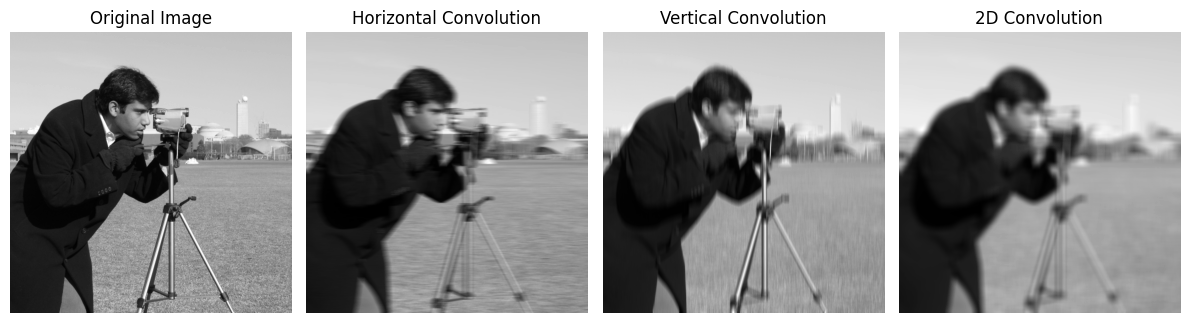

In [ ]:
# solution
# Visualize the original and convolved images
fig, axes = plt.subplots(1, 4, figsize=(12, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(horizontal_convolution, cmap='gray')
axes[1].set_title('Horizontal Convolution')
axes[1].axis('off')

axes[2].imshow(vertical_convolution, cmap='gray')
axes[2].set_title('Vertical Convolution')
axes[2].axis('off')

axes[3].imshow(two_dimensional_convolution, cmap='gray')
axes[3].set_title('2D Convolution')
axes[3].axis('off')

plt.tight_layout()
plt.show()


*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


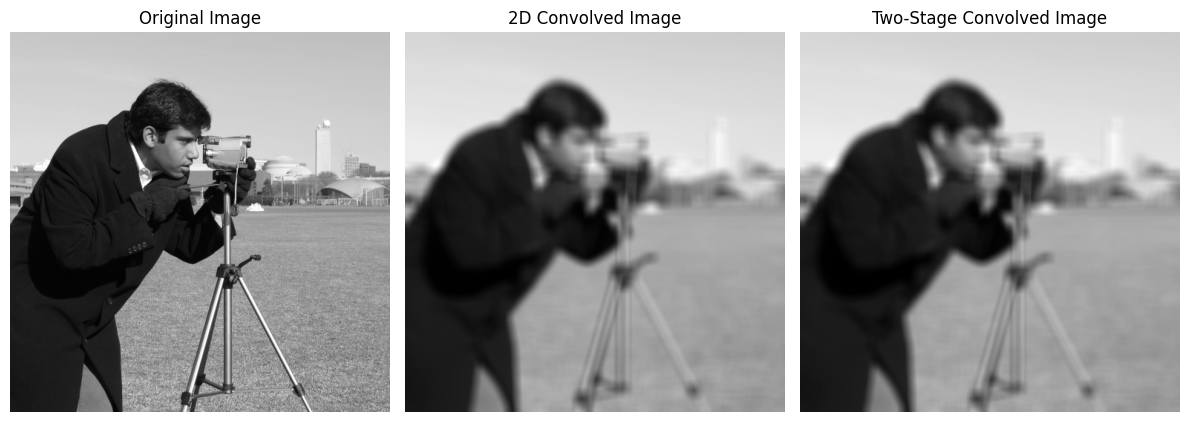

In [ ]:
# solution
# Define the function to apply two-stage convolution
def convolve_image_two_stage(image, horizontal_size, vertical_size):
    # Create horizontal mask
    horizontal_mask = np.ones(shape=(1, horizontal_size), dtype=np.float64)
    # Normalize the mask
    horizontal_mask /= horizontal_mask.sum()

    # Create vertical mask
    vertical_mask = np.ones(shape=(vertical_size, 1), dtype=np.float64)
    # Normalize the mask
    vertical_mask /= vertical_mask.sum()

    # First, apply horizontal convolution
    stage1_convolution = convolve(image, horizontal_mask)
    # Then, apply vertical convolution on the result of the first convolution
    stage2_convolution = convolve(horizontal_convolution, vertical_mask)
    return stage2_convolution

# Apply two-stage convolution
two_stage_convolution = convolve_image_two_stage(image, 15, 15)

# Visualize the original image, 2D convolved image, and two-stage convolved image
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# 2D convolved image (from the previous 2D convolution step)
axes[1].imshow(two_dimensional_convolution, cmap='gray')
axes[1].set_title('2D Convolved Image')
axes[1].axis('off')

# Two-stage convolved image
axes[2].imshow(two_stage_convolution, cmap='gray')
axes[2].set_title('Two-Stage Convolved Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**

For large enough masks like 15×15, if your print the arrays of two images the difference is minimal, it is hard to see any changes.

# Image Blurring

*   Why is blurring important?



**Solution**


Blurring is esential when we want to remove some small details to obtain the overall larger picture.


...

### Exercise: Gaussian Filter
*   Read 'astronaut' image from the data module
*   Convert the image to grayscale.
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

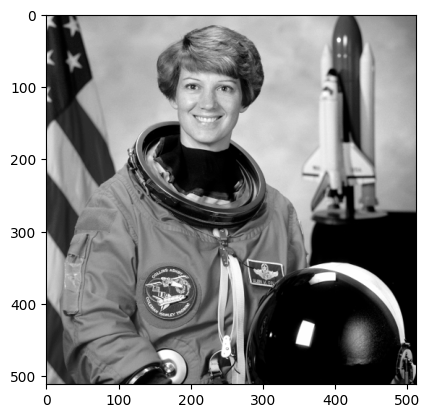

In [ ]:
# solution
image = skimage.data.astronaut()
image_grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_grayscale,cmap = 'gray')


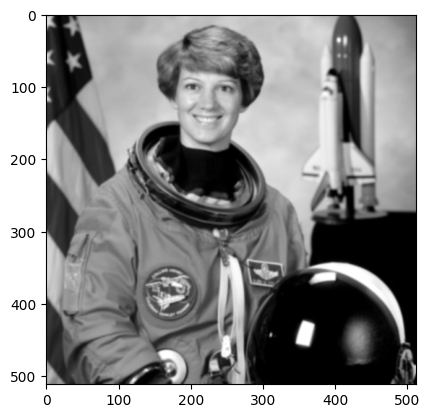

In [ ]:
image_1 = skimage.filters.gaussian(image_grayscale, sigma=1)
plt.imshow(image_1,cmap = 'gray')

*   Apply a gaussian filter with sigma=0. What is the result of this operation?

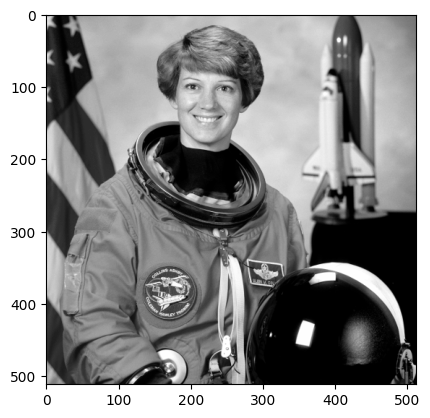

In [ ]:
# solution
image_0 = skimage.filters.gaussian(image_grayscale, sigma=0)
plt.imshow(image_0,cmap = 'gray')
# since the sigma is 0 => standard deviation of the filter is 0 => no filter was applied


*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

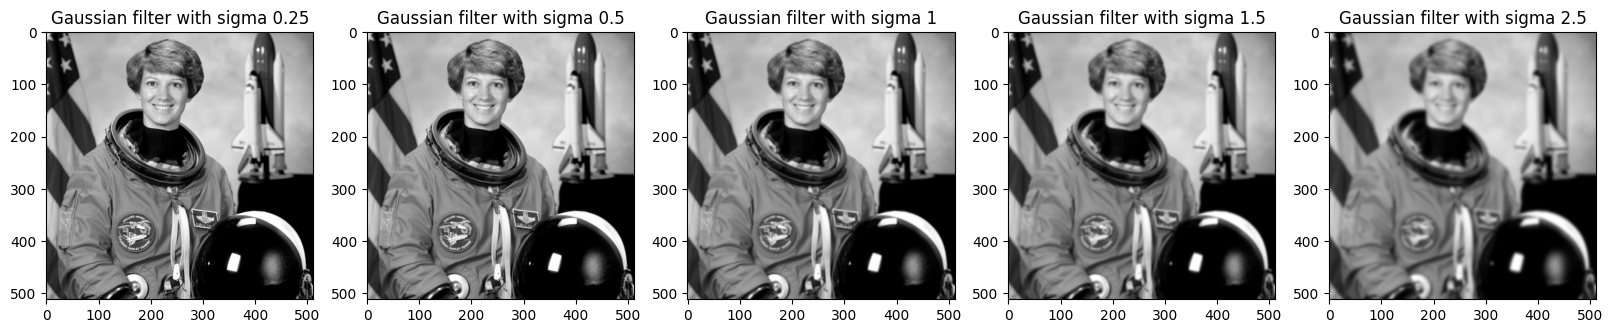

In [ ]:
# solution
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

image_025 = skimage.filters.gaussian(image_grayscale, sigma=0.25)
axs[0].imshow(image_025,cmap = 'gray')
axs[0].set_title('Gaussian filter with sigma 0.25')

image_05 = skimage.filters.gaussian(image_grayscale, sigma=0.5)
axs[1].imshow(image_05,cmap = 'gray')
axs[1].set_title('Gaussian filter with sigma 0.5')

axs[2].imshow(image_1,cmap = 'gray')
axs[2].set_title('Gaussian filter with sigma 1')

image_15 = skimage.filters.gaussian(image_grayscale, sigma=1.5)
axs[3].imshow(image_15,cmap = 'gray')
axs[3].set_title('Gaussian filter with sigma 1.5')

image_25 = skimage.filters.gaussian(image_grayscale, sigma=2.5)
axs[4].imshow(image_25,cmap = 'gray')
axs[4].set_title('Gaussian filter with sigma 2.5')

plt.show()


*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    What determines the optimal sigma value?




**Solution**

The more is the sigma, the more is the blurring spread because sigma is the standard deviation of the filter. With the same logic, the less is the sigma, the less spread blurring we can notice. An optimal sigma depends on our preference. If we want to see the larger picture without loosing important details,we should try different sigmas and evaluate the results visually. In this case, 1.5 seems the most suitable value for sigma, since it eliminates the small details, however the larger picture is preserved.

...

### Exercise: Median Filter
*   Convert the 'astronaut' image to grayscale
*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Visualize the original image and the filtered image matplotlib subplot.

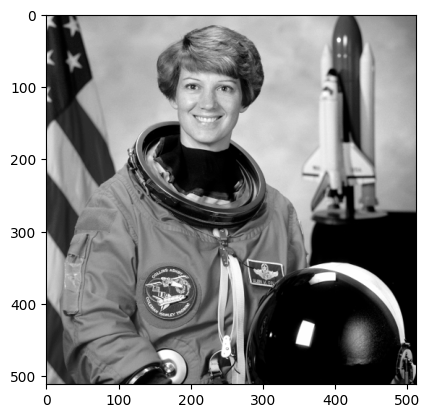

In [ ]:
# solution
image = skimage.data.astronaut()
image_grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred_1 = median_filter(image_grayscale,1)
plt.imshow(blurred_1,cmap = "gray")


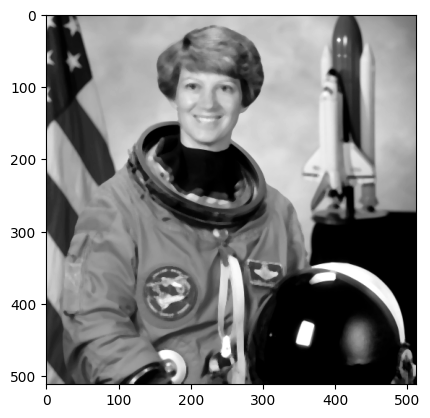

In [ ]:
blurred_5 = median_filter(image_grayscale,5)
plt.imshow(blurred_5,cmap = "gray")

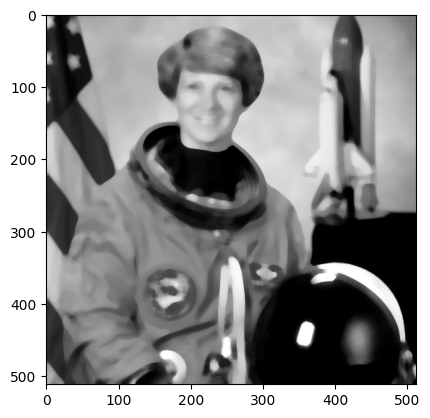

In [ ]:
blurred_10 = median_filter(image_grayscale,10)
plt.imshow(blurred_10,cmap = "gray")

*   Change the structuring element to square, rectangle and diamond
*   Visualize the original image and the filtered image using matplotlib

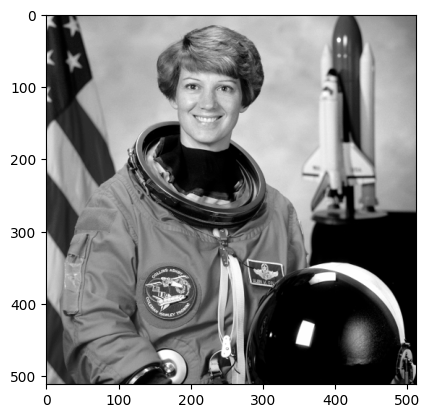

In [ ]:
# solution
plt.imshow(image_grayscale,cmap = 'gray')

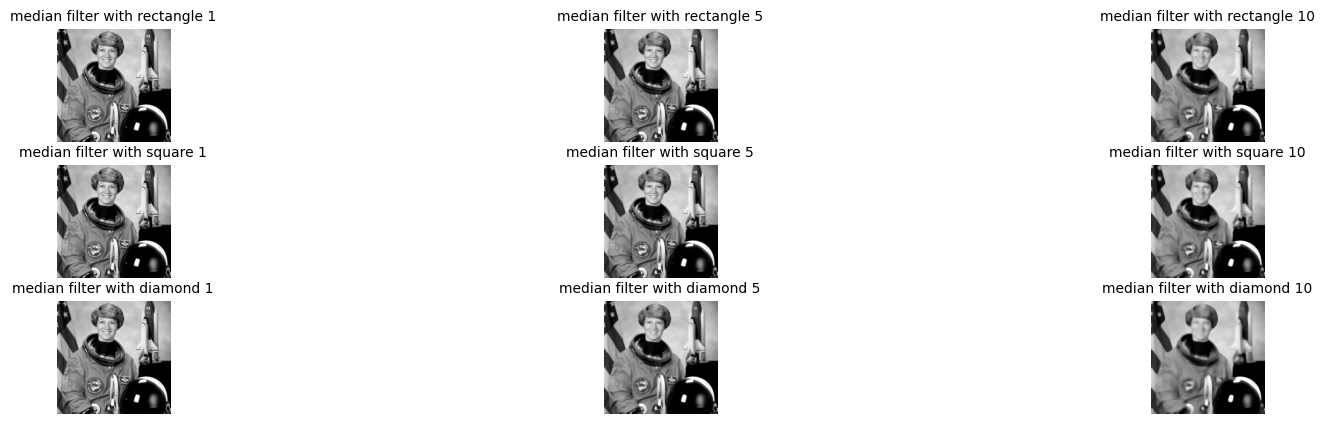

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20, 5))


blurred_rectangle_1 = median_filter(image_grayscale,footprint =rectangle(1,1))
axs[0,0].imshow(blurred_rectangle_1,cmap = 'gray')
axs[0,0].set_title('median filter with rectangle 1',fontsize=10)
axs[0,0].axis('off')
blurred_rectangle_5 = median_filter(image_grayscale,footprint =rectangle(5,5))
axs[0,1].imshow(blurred_rectangle_5,cmap = 'gray')
axs[0,1].set_title('median filter with rectangle 5',fontsize=10)
axs[0,1].axis('off')
blurred_rectangle_10 = median_filter(image_grayscale,footprint =rectangle(10,10))
axs[0,2].imshow(blurred_rectangle_10,cmap = 'gray')
axs[0,2].set_title('median filter with rectangle 10',fontsize=10)
axs[0,2].axis('off')

blurred_square_1 = median_filter(image_grayscale,footprint =square(1))
axs[1,0].imshow(blurred_square_1,cmap = 'gray')
axs[1,0].set_title('median filter with square 1',fontsize=10)
axs[1,0].axis('off')
blurred_square_5 = median_filter(image_grayscale,footprint =square(5))
axs[1,1].imshow(blurred_square_5,cmap = 'gray')
axs[1,1].set_title('median filter with square 5',fontsize=10)
axs[1,1].axis('off')
blurred_square_10 = median_filter(image_grayscale,footprint =square(10))
axs[1,2].imshow(blurred_square_10,cmap = 'gray')
axs[1,2].set_title('median filter with square 10',fontsize=10)
axs[1,2].axis('off')

blurred_diamond_1 = median_filter(image_grayscale,footprint =diamond(1))
axs[2,0].imshow(blurred_diamond_1,cmap = 'gray')
axs[2,0].set_title('median filter with diamond 1',fontsize=10)
axs[2,0].axis('off')

blurred_diamond_5 = median_filter(image_grayscale,footprint =diamond(5))
axs[2,1].imshow(blurred_diamond_5,cmap = 'gray')
axs[2,1].set_title('median filter with diamond 5',fontsize=10)
axs[2,1].axis('off')
blurred_diamond_10 = median_filter(image_grayscale,footprint =diamond(10))
axs[2,2].imshow(blurred_diamond_10,cmap = 'gray')
axs[2,2].set_title('median filter with diamond 10',fontsize=10)
axs[2,2].axis('off')
plt.show()


*   What is the effect of the structuring element on the median filter?


**Solution**

The structuring element is the shape of the filter that slides over the pixels, hence it has an essential role how the blurring will effect the image based on the neighboring pixels ( according to the shape given by the strycturing element)



*   What is the difference between gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

The gausian filter uses gaussian distibution to perform blurring, mean and median filters are just using the neighboring elements for blurring either by mean or median resepctively. Gaussian filter can be used when we need to remove the hgh frequency details of the image, however preserving the larger picture. In case of mean filter and median filter, we would prefer it when the image is more or less homogeneous, so we don't distract the details.

### Exercise: Effect of noise

It is easy to add noise to an image using the random_noise function available in skimage.util

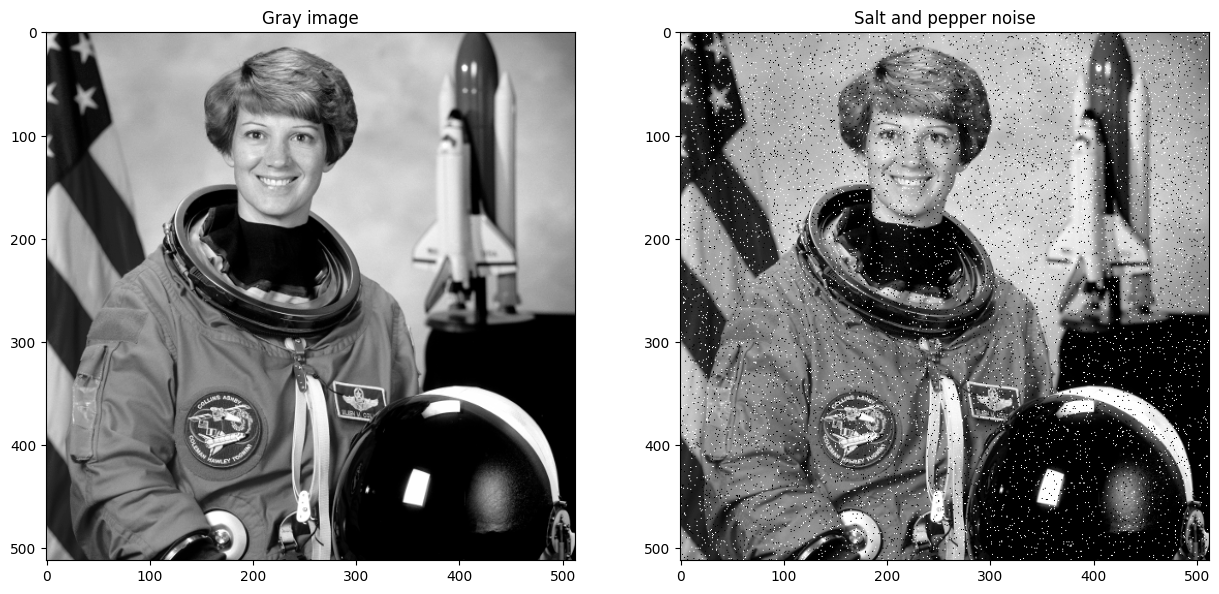

In [ ]:
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')

plt.show()

*   Create noisy images with **gaussian** noise and **salt and pepper** noise.
*   Apply mean filter, median filter and gaussian filter in each of the noisy images.
*   Visualize the images and observe the difference in each filter with respect to the noise.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


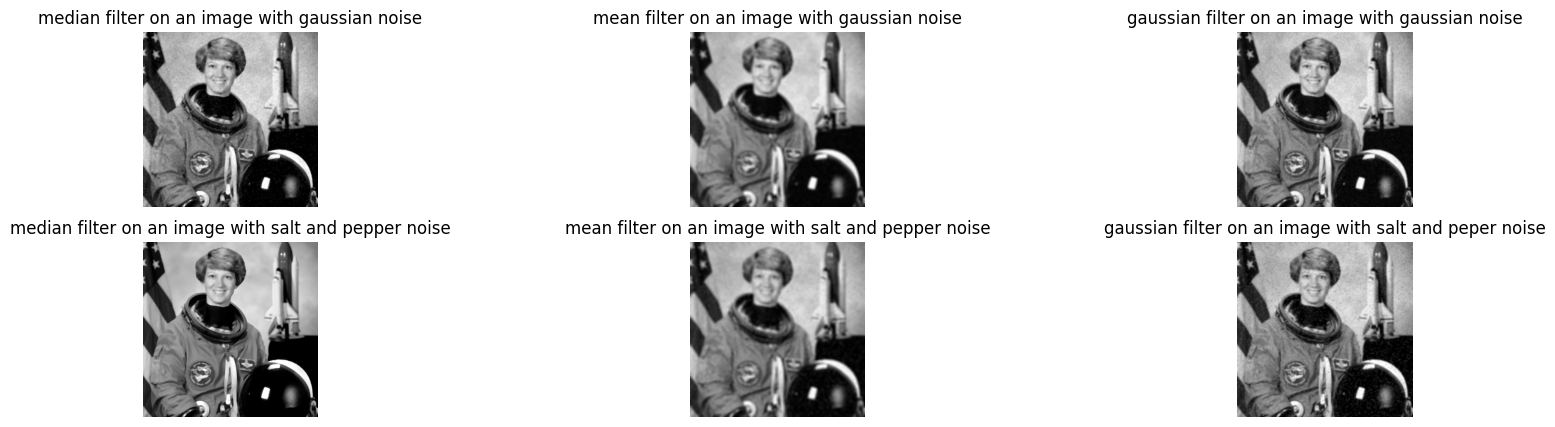

In [ ]:
# solution
img_noise_gaus = random_noise(image, mode='gaussian')
img_sp = random_noise(image, mode='s&p')

fig, axs = plt.subplots(2, 3, figsize=(20, 5))

img_noise_gaus_median = median_filter(img_noise_gaus, 5)
axs[0,0].imshow(img_noise_gaus_median,cmap = 'gray')
axs[0,0].set_title('median filter on an image with gaussian noise')
axs[0,0].axis('off')
img_noise_gaus_mean = rank.mean(img_noise_gaus, disk(5))
axs[0,1].imshow(img_noise_gaus_mean,cmap = 'gray')
axs[0,1].set_title('mean filter on an image with gaussian noise')
axs[0,1].aixis('off')
img_noise_gaus_filter_gaus  = skimage.filters.gaussian(img_noise_gaus, sigma=1.5)
axs[0,2].imshow(img_noise_gaus_filter_gaus,cmap = 'gray')
axs[0,2].set_title('gaussian filter on an image with gaussian noise')
axs[0,2].axis('off')

img_sp_median = median_filter(img_sp, 5)
axs[1,0].imshow(img_sp_median,cmap = 'gray')
axs[1,0].set_title('median filter on an image with salt and pepper noise')
axs[1,0].axis('off')
img_sp_mean = rank.mean(img_sp, disk(5))
axs[1,1].imshow(img_sp_mean,cmap = 'gray')
axs[1,1].set_title('mean filter on an image with salt and pepper noise')
axs[1,1].axis('off')
img_sp_filter_gaus  = skimage.filters.gaussian(img_sp, sigma=1.5)
axs[1,2].imshow(img_sp_filter_gaus,cmap = 'gray')
axs[1,2].set_title('gaussian filter on an image with salt and peper noise')
axs[1,2].axis('off')

plt.show()






*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**
For gausian noise median filter works the best since the details preserved while noise is fully eliminated, while for other filters we can see some noise. For salt and pepper noise again the median filter is the best as it preserved more details than other filters.


# Image Sharpening

A sharpening filter can be broken down into two steps: It takes a smoothed image, subtracts it from the original image to obtain the "details" of the image, and adds the "details" to the original image.

enhanced image = original + amount * (original - blurred)

### Exercise:
*   Read 'astronaut' image from the data module
*   Convert the image to grayscale
*   Perform smoothing using a gaussian filter of sigma 1
*   Subtract the smoothened image from the original image.
*   Enhance the image with amount=1
*   Visualize each of the steps using matplotlib

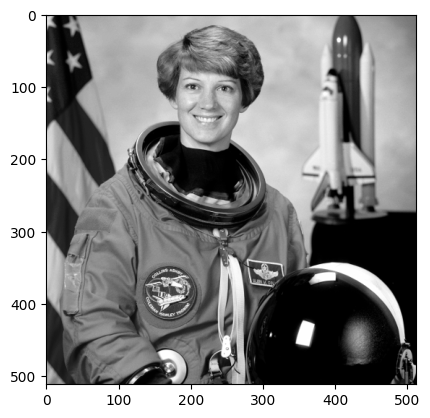

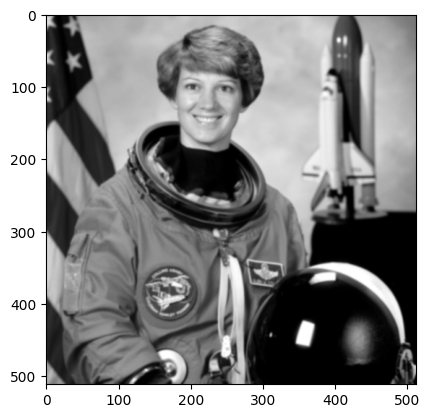

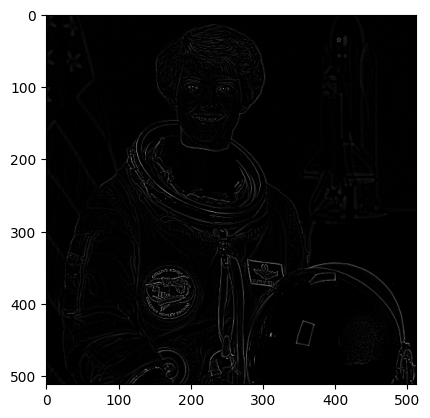

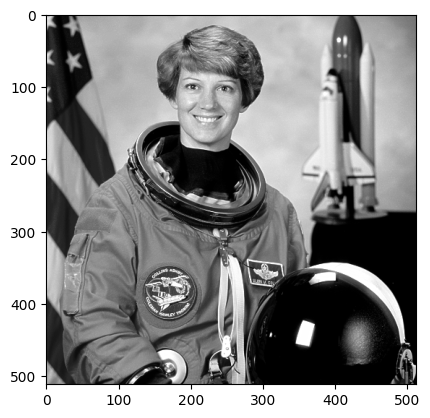

In [ ]:
# solution
image = skimage.data.astronaut()
image_grayscale = color.rgb2gray(image)
plt.imshow(image_grayscale,cmap = 'gray')
plt.show()
image_grayscale_filtered = skimage.filters.gaussian(image_grayscale, sigma=1)
plt.imshow(image_grayscale_filtered,cmap = 'gray')
plt.show()
subtracted = np.clip((image_grayscale-image_grayscale_filtered),0,1)
plt.imshow(subtracted,cmap = 'gray')
plt.show()
enhanced = np.clip(image_grayscale+ 1*(subtracted),0,1)
plt.imshow(enhanced,cmap = 'gray')
plt.show()


*   Keeping amount=1, change the value of sigma=5,10 and repeat the enhancements
*   Using the best sigma value, vary the amount value=0.5,2,5,10
*   Visualize the sharpened images using matplotlib

In [ ]:
# solution
def enhance(image,sigma_, amount):
  image = skimage.data.astronaut()
  image_grayscale = color.rgb2gray(image)
  image_grayscale_filtered = skimage.filters.gaussian(image_grayscale, sigma=sigma_)
  subtracted = np.clip((image_grayscale-image_grayscale_filtered),0,1)
  return np.clip(enhanced,0,1)



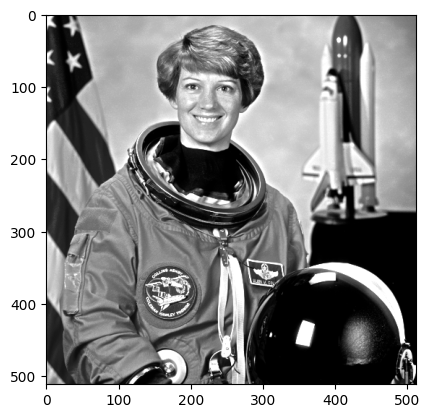

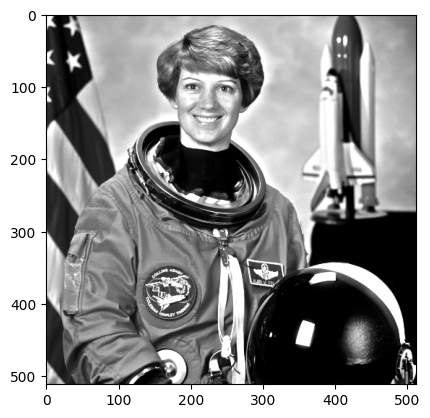

In [ ]:
image = skimage.data.astronaut()
enhanced_5  = enhance(image,5, 1)
plt.imshow(enhanced_5,cmap = 'gray')
plt.show()
enhanced_10  = enhance(image,10, 1)
plt.imshow(enhanced_10,cmap = 'gray')
plt.show()

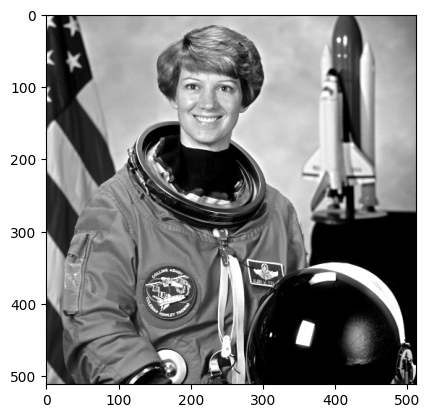

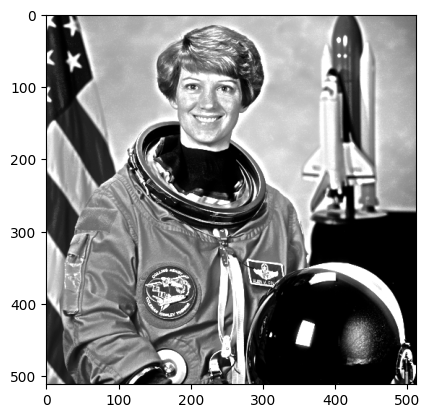

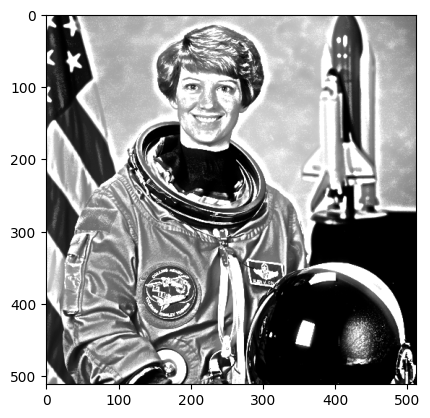

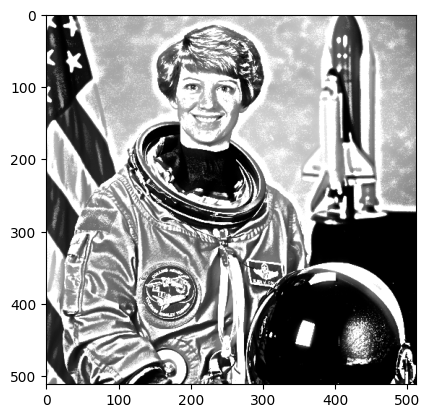

In [ ]:
# since the sigma 5 is better enhancing teh details,let's choose it as a sigma

image = skimage.data.astronaut()
enhanced_05 = enhance(image,5, 0.5)
plt.imshow(enhanced_05,cmap = 'gray')
plt.show()

image = skimage.data.astronaut()
enhanced_2 = enhance(image,5, 2)
plt.imshow(enhanced_2,cmap = 'gray')
plt.show()

image = skimage.data.astronaut()
enhanced_5 = enhance(image,5, 5)
plt.imshow(enhanced_5,cmap = 'gray')
plt.show()

image = skimage.data.astronaut()
enhanced_10 = enhance(image,5, 10)
plt.imshow(enhanced_10,cmap = 'gray')
plt.show()

**Solution**
According to the results, sigma 5 and amount 0.5 is the best for enhancing the details and sharpening the image

# Edge Detection

### Exercise:
*   Read 'camera' image from the data module
*   Perform sobel, prewitt and roberts edge detection on the image
*   Visualize the original image, the edges and the edges superimposed on the original image

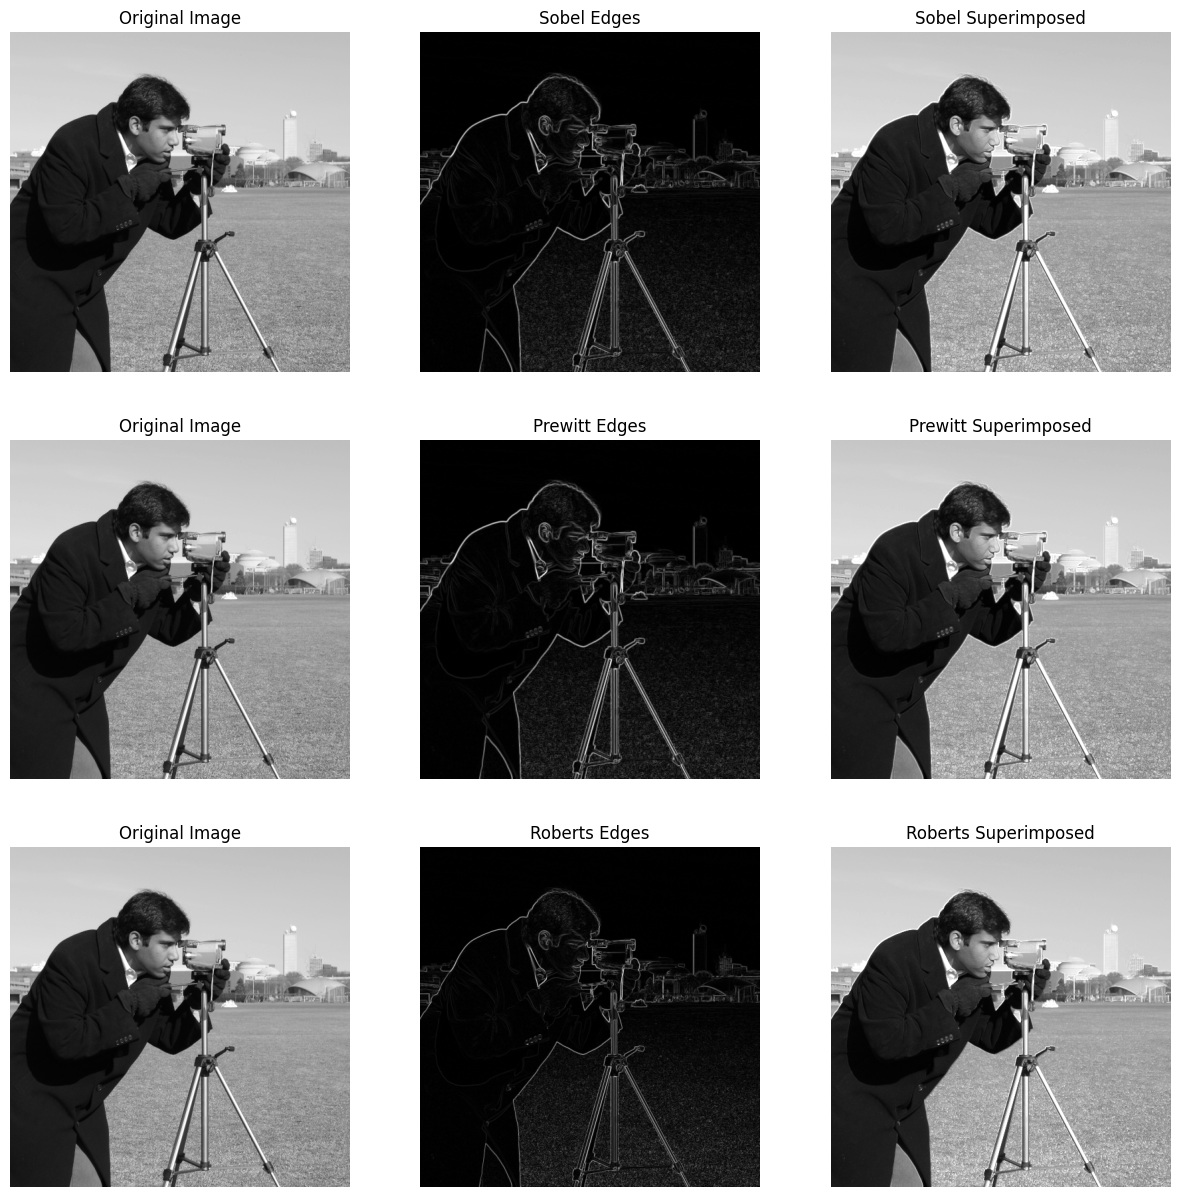

In [ ]:
image = data.camera()
# Perform edge detection using Sobel, Prewitt, and Roberts filters
edges_sobel = filters.sobel(image)
edges_prewitt = filters.prewitt(image)
edges_roberts = filters.roberts(image)

# Function to superimpose edges on the original image
def superimpose_edges(image, edges):
  #The np.clip function ensures that the resulting pixel values stay
  #within the valid range for an 8-bit image,
  #example : between 0 (black) and 255 (white).
    return np.clip(image + edges * 255, 0, 255).astype(np.uint8)

# Superimpose the edges on the original image
sobel_superimposed = superimpose_edges(image, edges_sobel)
prewitt_superimposed = superimpose_edges(image, edges_prewitt)
roberts_superimposed = superimpose_edges(image, edges_roberts)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Original images
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Sobel edge detection and superimposed image
axes[0, 1].imshow(edges_sobel, cmap='gray')
axes[0, 1].set_title('Sobel Edges')
axes[0, 1].axis('off')
axes[0, 2].imshow(sobel_superimposed, cmap='gray')
axes[0, 2].set_title('Sobel Superimposed')
axes[0, 2].axis('off')

# Prewitt edge detection and superimposed image
axes[1, 0].imshow(image, cmap='gray')
axes[1, 0].set_title('Original Image')
axes[1, 0].axis('off')
axes[1, 1].imshow(edges_prewitt, cmap='gray')
axes[1, 1].set_title('Prewitt Edges')
axes[1, 1].axis('off')
axes[1, 2].imshow(prewitt_superimposed, cmap='gray')
axes[1, 2].set_title('Prewitt Superimposed')
axes[1, 2].axis('off')

# Roberts edge detection and superimposed image
axes[2, 0].imshow(image, cmap='gray')
axes[2, 0].set_title('Original Image')
axes[2, 0].axis('off')
axes[2, 1].imshow(edges_roberts, cmap='gray')
axes[2, 1].set_title('Roberts Edges')
axes[2, 1].axis('off')
axes[2, 2].imshow(roberts_superimposed, cmap='gray')
axes[2, 2].set_title('Roberts Superimposed')
axes[2, 2].axis('off')

plt.show()


*   What is the difference between each of the edge detectors?
*   What does you think is the limitation of each of the detector?



**Solution**

1.   Sobel is sensitive to noise but good at detecting edges in noisier images.

2. Prewitt is faster but lacks the smoothing of Sobel.

Sobel and Prewitt are the same, the only difference in that Sobel uses non-uniform weights resulting in giving more importance to closest neighbors.

3.  Roberts is more sensitive to noise compare with the two above and has a smaller kernel size(2x2). It produces sharp but noisy edges.

Limitations :
1.   Using Sobel thicker edges can be problematic for tasks needing finer detail.
2.  Perwitt is less robust to noise compared to Sobel because of the lack of weighted averaging and it also produces thicker edges, which might be problematic for applications requiring finer detail.
3.  Roberts is very sensitive to noise as it doesn’t perform any smoothing, more prone to missing edges in images with gradual intensity transitions and poor performance on low resolution images due to the small kernel size.









### Exercise: Canny edge detector
*   Read 'camera' image from the data module
*   Apply canny operator with default parameters
*   Apply canny by varying sigma=1, 3, 5, 10
*   Visualize the original image along with the edges detected using matplotlib.

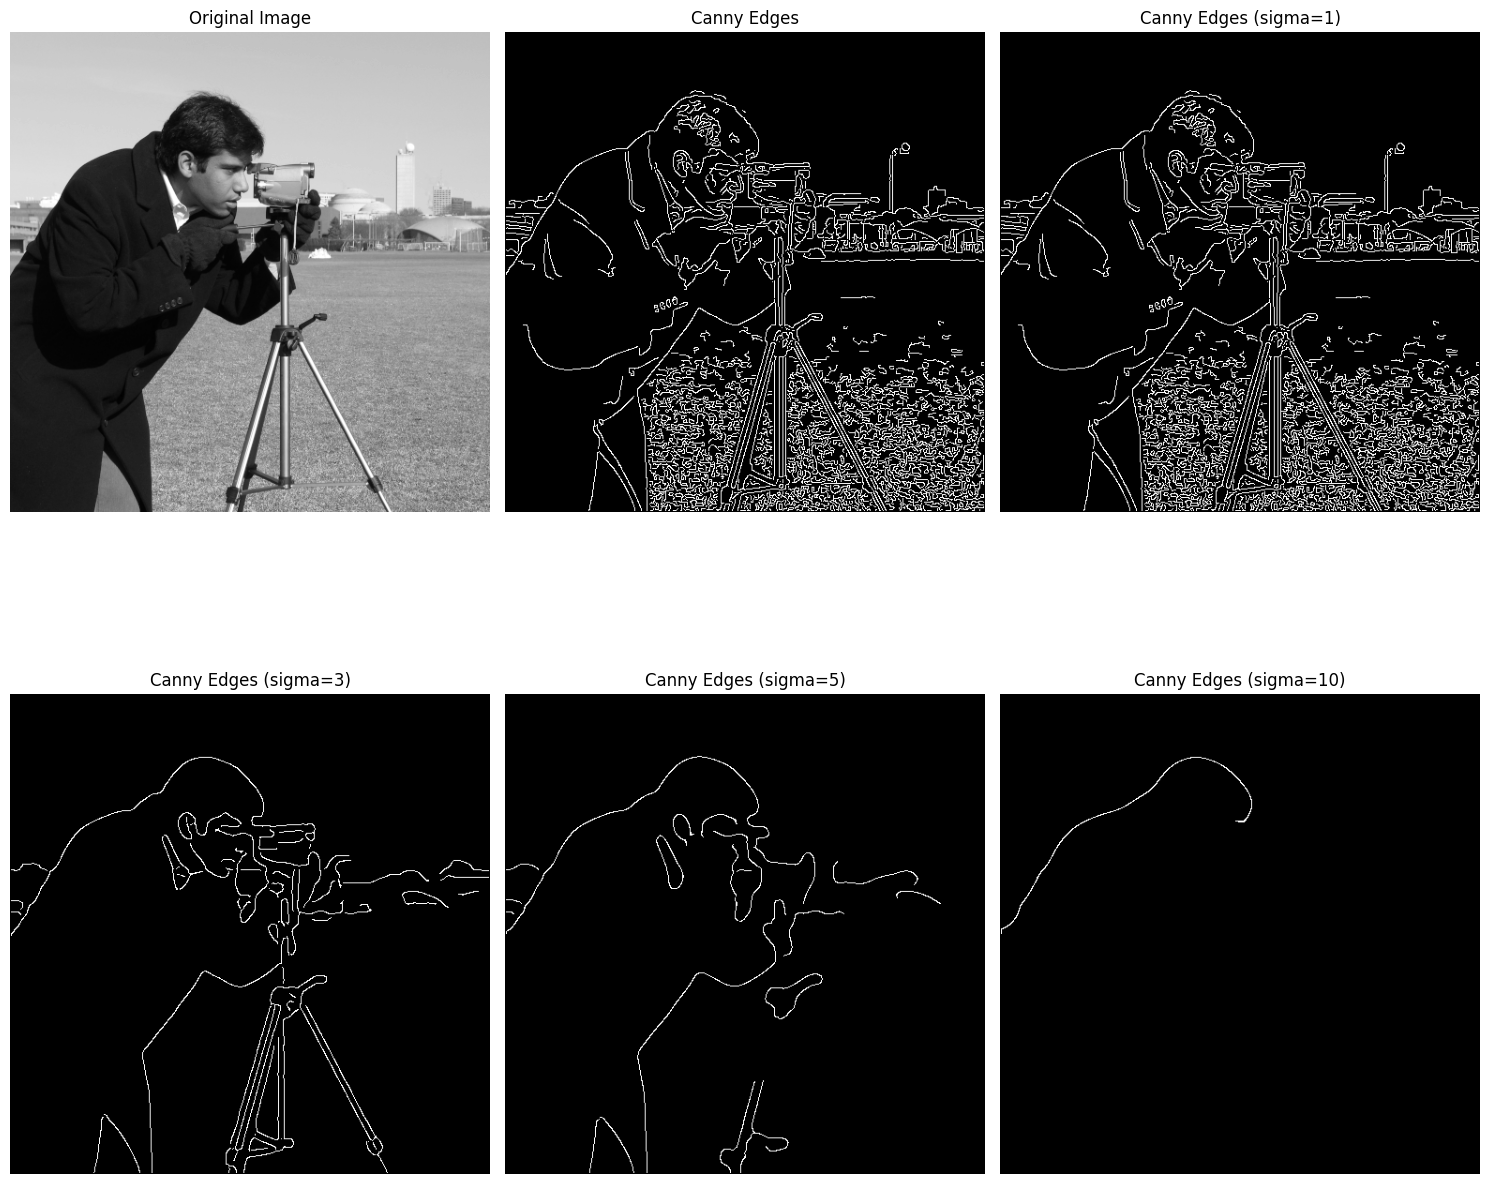

In [ ]:
# solution
image = data.camera()

# Apply the Canny edge detection with default parameters
edges = feature.canny(image)
# Apply the Canny edge detection with varying sigma values
edges_sigma_1 = feature.canny(image, sigma=1)
edges_sigma_3 = feature.canny(image, sigma=3)
edges_sigma_5 = feature.canny(image, sigma=5)
edges_sigma_10 = feature.canny(image, sigma=10)

fig, axes = plt.subplots(2, 3, figsize=(15, 15))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(edges, cmap='gray')
axes[0, 1].set_title('Canny Edges')
axes[0, 1].axis('off')

axes[0, 2].imshow(edges_sigma_1, cmap='gray')
axes[0, 2].set_title('Canny Edges (sigma=1)')
axes[0, 2].axis('off')

axes[1, 0].imshow(edges_sigma_3, cmap='gray')
axes[1, 0].set_title('Canny Edges (sigma=3)')
axes[1, 0].axis('off')

axes[1, 1].imshow(edges_sigma_5, cmap='gray')
axes[1, 1].set_title('Canny Edges (sigma=5)')
axes[1, 1].axis('off')

axes[1, 2].imshow(edges_sigma_10, cmap='gray')
axes[1, 2].set_title('Canny Edges (sigma=10)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?

**Solution**
*   *Small Sigma* (e.g., sigma = 1)less smoothing, which preserves more detail and small edges. The algorithm detects more edges, including noise or fine details in the image.
Large Sigma (e.g., sigma = 10) more smoothing, which blurs out fine details and noise.Fewer, smoother, and more prominent edges are detected.The algorithm captures only the major edges and discards smaller or less prominent ones.

*   Low Threshold defines the minimum value for an edge to be considered as a "potential edge."Pixels with gradients above the low threshold are initially considered edges.
However, these edges are weak and may not be retained unless they are connected to strong edges.
High Threshold defines the minimum gradient value for an edge to be considered a "strong edge."Pixels with gradients above the high threshold are marked as strong edges and are immediately considered part of the final edge output.




*   What is the algorithm behind the Canny operator?



**Solution**

1. Filter image with derivative of Gaussian.
2. Find magnitude and orientation of gradient.
3. Non-Maximum Suppression
    *  Thin wide "ridges" down to single pixel width
4. Linking and thresholding(hysteresis)
    *  Define two thresholds: low and high
    *  Use the high threshold to start edge curves and low threshold to continue them.


---

## **End of P3: Filters and Edges**

This notebook is part of **Deliverable 1**

Deadline for Deliverable 1 (P2 and P3) submission in CampusVirtual is: **Monday, the 14th of October, 2024**
